<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=250 style="padding: 10px"> 
<br><b>Confirming DP0.3 against Horizons</b> <br>
Contact author(s): Jake Kurlander<br>
Last verified to run: 2024-06-01 <br>
Container size: medium <br>
Targeted learning level: beginner <br>

**Description:** Practice selecting Solar System object data and querying external services for those same objects.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pandas as pd
from lsst.rsp import get_tap_service
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.time import Time
from astroquery.jplhorizons import Horizons

# Investigate Objects of Interest

In [33]:
service = get_tap_service("ssotap")

mpcorb_results = service.search("SELECT * FROM dp03_catalogs_10yr.mpcorb WHERE mpcDesignation in ('1999 RQ36', '1979 HP', '2003 UB313')")

mpcorb_results = mpcorb_results.to_table().to_pandas()
print(len(mpcorb_results))


3


In [34]:
ssObjectId_strings = str(tuple(mpcorb_results['ssObjectId'].values.astype(str)))
ssObjectId_strings


"('2711058357623702957', '4461427635112752985', '-3574538124279186555')"

In [35]:
results = service.search("SELECT * FROM dp03_catalogs_10yr.diaSource WHERE ssObjectID in " + ssObjectId_strings)
results = results.to_table().to_pandas()
results_groups = results.groupby("nameTrue")

In [36]:
for name, group in results_groups:
    print(name)

1979 HP
1999 RQ36
2003 UB313


In [37]:
group

,band,ccdVisitId,dec,decErr,decTrue,diaObjectId,diaSourceId,mag,magErr,magTrueVband,midPointMjdTai,nameTrue,ra,ra_dec_Cov,raErr,raTrue,snr,ssObjectId,ssObjectReassocTime
0,z,651708,-0.192581,0.000004,-0.192584,2957729456878752376,27027891304214751,18.493999,0.015,18.657001,61372.25112,2003 UB313,26.649032,0.0,0.000004,26.649032,61.402267,-3574538124279186555,61372.25112
1,i,489654,-0.312901,0.000002,-0.312901,720094120491433100,29940987989337770,18.545000,0.010,18.702892,61086.02446,2003 UB313,26.390797,0.0,0.000002,26.390800,92.103401,-3574538124279186555,61086.02446
2,i,621090,-0.051059,0.000002,-0.051064,246340698818541568,41309021367657427,18.471001,0.006,18.624197,61314.30382,2003 UB313,27.167181,0.0,0.000002,27.167188,153.505676,-3574538124279186555,61314.30382
3,i,667088,-0.191452,0.000002,-0.191454,-7011684544345864060,70295276537707140,18.531000,0.004,18.685703,61400.07052,2003 UB313,26.489950,0.0,0.000002,26.489950,230.258514,-3574538124279186555,61400.07052
4,i,1661285,1.323784,0.000002,1.323777,-4028239212011442335,71763594625041569,18.474001,0.004,18.622856,63128.36536,2003 UB313,27.914763,0.0,0.000002,27.914763,230.258514,-3574538124279186555,63128.36536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,z,643619,-0.178120,0.000002,-0.178119,-3137007438234025670,-170804290115417688,18.486000,0.005,18.641962,61361.15521,2003 UB313,26.737731,0.0,0.000002,26.737732,184.206802,-3574538124279186555,61361.15521
539,i,675286,-0.173691,0.000002,-0.173690,2809344985324400237,-168052000166319614,18.551001,0.005,18.693729,61412.05348,2003 UB313,26.456896,0.0,0.000002,26.456898,184.206802,-3574538124279186555,61412.05348
540,r,1217341,0.902392,0.000002,0.902392,3437365630257900456,-166943903265095313,18.643999,0.003,18.675905,62358.38590,2003 UB313,27.870231,0.0,0.000002,27.870232,307.011353,-3574538124279186555,62358.3859
541,z,1450206,1.090771,0.000002,1.090769,-5625116358016825920,-110708389422314783,18.482000,0.006,18.641727,62752.32355,2003 UB313,27.863114,0.0,0.000002,27.863114,153.505676,-3574538124279186555,62752.32355


# Plot Comparisons

In [45]:
#Plot ra and decs of DP0.3 detections, as well as Horizons 
def scatter_and_plot_skypath(dp03_ra, dp03_dec, horizons_same_time_ra, horizons_same_time_dec, 
                             horizons_uniform_time_ra, horizons_uniform_time_dec, ObjID): 
    plt.scatter(dp03_ra, dp03_dec, label='DP0.3 positions')
    plt.plot(horizons_uniform_time_ra, horizons_uniform_time_dec, label='Horizons path')
    plt.title(ObjID + ' skypath')
    plt.scatter(horizons_same_time_ra, horizons_same_time_dec, s=7, color='yellow', label='Horizons positions')
    plt.xlabel('RA (deg)')
    plt.ylabel('Dec (deg)')
    plt.legend()
    plt.show()


def scatter_differences(dp03_ra, dp03_dec, horizons_same_time_ra, horizons_same_time_dec, mjds, ObjID):
    plt.title(ObjID + ' DP0.3-Horizons Disagreement')
    plt.scatter((horizons_same_time_ra-dp03_ra) * 3600, (horizons_same_time_dec-dp03_dec) * 3600)
    plt.xlabel("RA disagreement (arcsec)")
    plt.ylabel("Dec disagreement (arcsec)")
    plt.show()

def scatter_bands_V(dp03_mjd, Horizons_V_same_time, dp03_detections, ObjID):
    plt.plot(dp03_mjd, Horizons_V_same_time, label='Horizons V magnitude')
    for band in 'ugrizy':
        banded_dp03 = dp03_detections[dp03_detections['band'] == band]
        banded_horizons = Horizons_V_same_time[dp03_detections['band'] == band]
        if len(banded_dp03) == 0:
            continue
        color_offset = np.mean(banded_dp03['mag'].values - banded_horizons)
        plt.scatter(banded_dp03['midPointMjdTai'], banded_dp03['mag'] - color_offset, label='corrected DP0.3 ' + band + ' magnitude')
    plt.legend()
    plt.xlabel('MJD')
    plt.ylabel('Magnitude')
    plt.title(ObjID + ' banded magnitudes')
    plt.show()

# Get Horizons data for each object, make plots

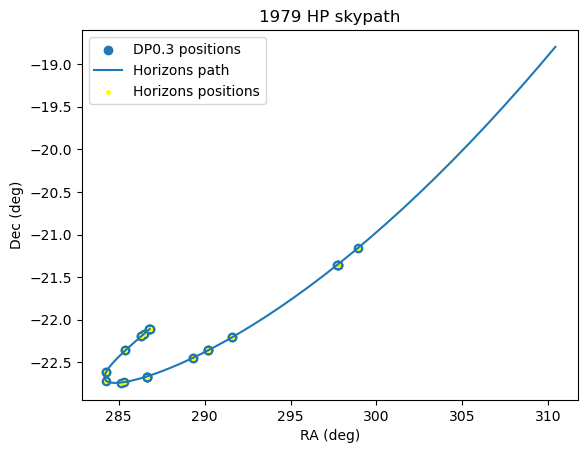

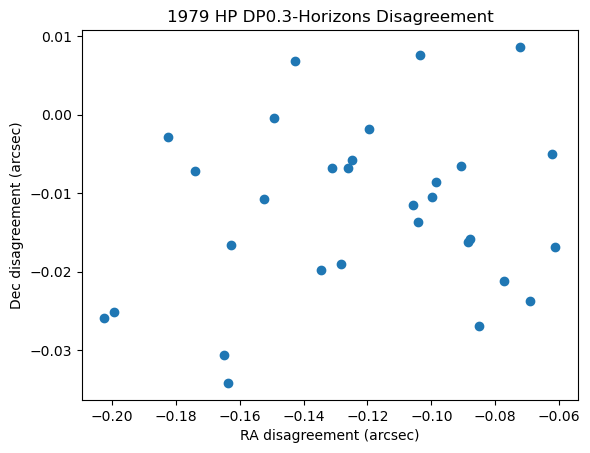

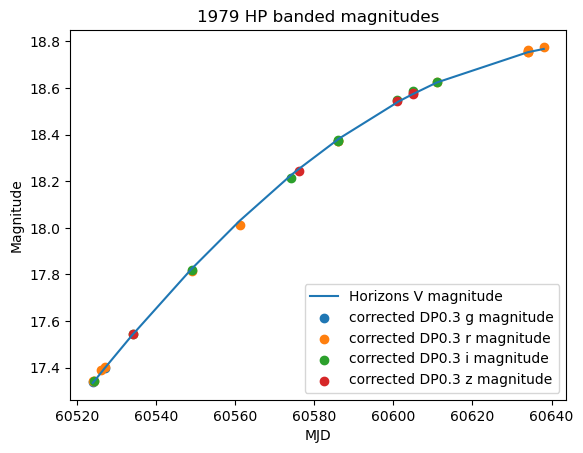

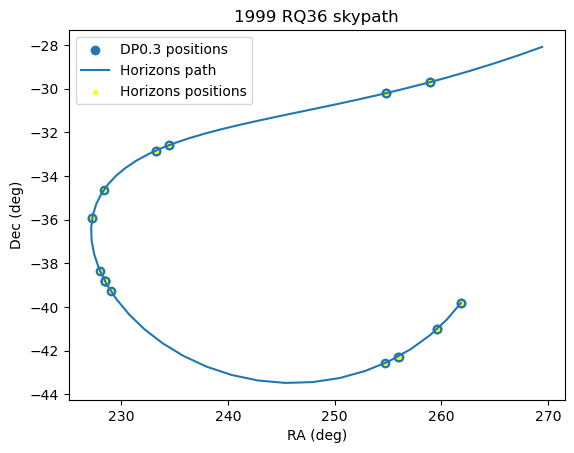

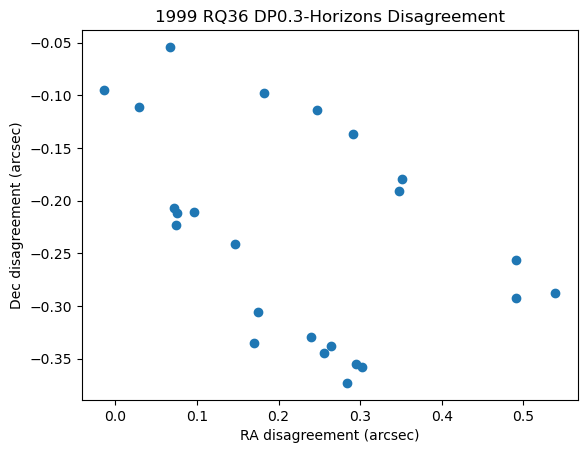

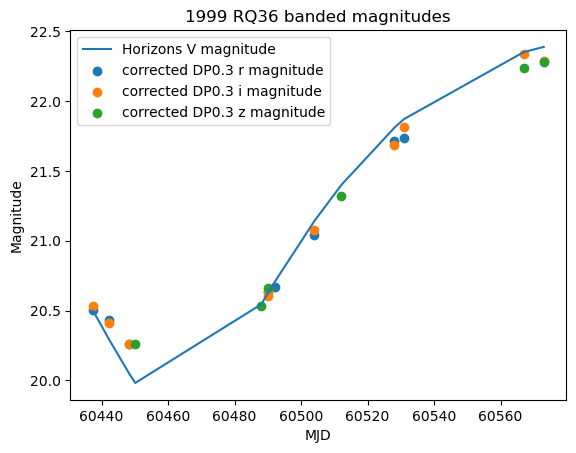

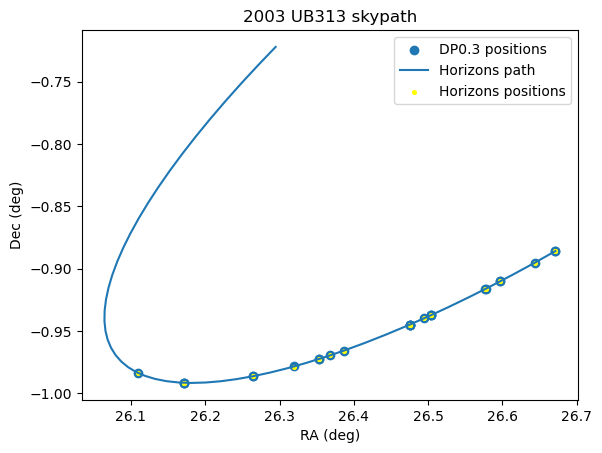

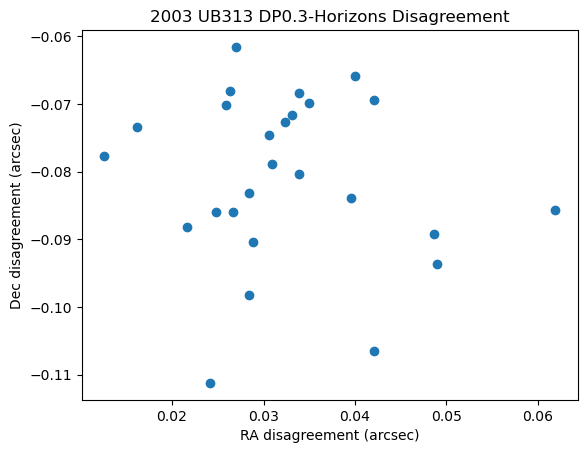

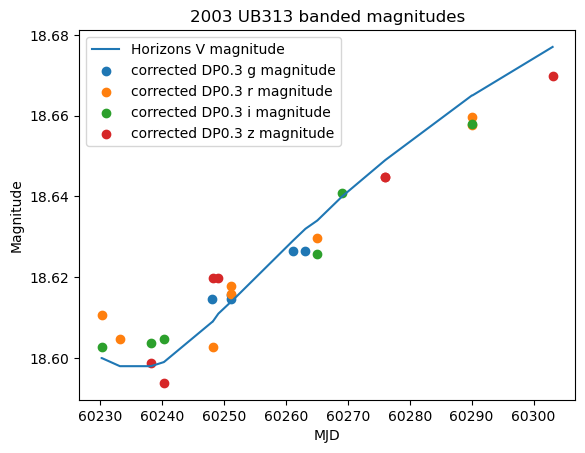

In [50]:
for ObjID, dp03_detections in results_groups:
    
    duration = 150
    t0 = min(dp03_detections['midPointMjdTai'])
    uniform_times = np.linspace(t0, t0+duration, 50)
    
    dp03_detections = dp03_detections[(dp03_detections['midPointMjdTai'] - t0)  < duration]
    dp03_detections = dp03_detections.sort_values('midPointMjdTai')

    dp03_ra, dp03_dec, dp03_mjd = dp03_detections[['ra', 'dec', 'midPointMjdTai']].values.T
    
    Horizons_eph_same_time = Horizons(id=ObjID, location='X05', epochs=dp03_mjd + 2400000.5).ephemerides()
    Horizons_ra_same_time = Horizons_eph_same_time['RA'].data.data
    Horizons_dec_same_time = Horizons_eph_same_time['DEC'].data.data
    Horizons_V_same_time = Horizons_eph_same_time['V'].data.data

    
    Horizons_eph_uniform_time = Horizons(id=ObjID, location='X05', epochs=uniform_times).ephemerides()
    Horizons_ra_uniform_time = Horizons_eph_uniform_time['RA'].data.data
    Horizons_dec_uniform_time = Horizons_eph_uniform_time['DEC'].data.data

    scatter_and_plot_skypath(dp03_ra, dp03_dec, Horizons_ra_same_time, Horizons_dec_same_time,
            Horizons_ra_uniform_time, Horizons_dec_uniform_time, ObjID)
    
    scatter_differences(dp03_ra, dp03_dec, Horizons_ra_same_time, Horizons_dec_same_time,
            detections['midPointMjdTai'], ObjID)

    scatter_bands_V(dp03_mjd, Horizons_V_same_time, dp03_detections, ObjID)
    print('\n' * 20)

# Summary statistics

In [53]:
epsilon = 0.0005
almost_2_63 = int(2 ** 63 * (1-epsilon))

In [54]:
service = get_tap_service("ssotap")

results = service.search("SELECT * FROM dp03_catalogs_10yr.DiaSource "+
                        f"WHERE diaSourceId > {almost_2_63}")

results = results.to_table().to_pandas()
print(len(results))


163723


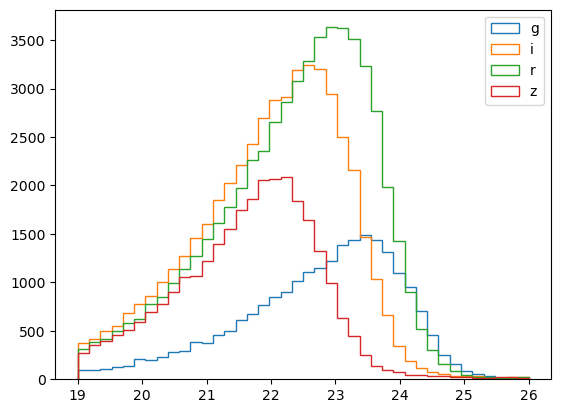

In [57]:
for g in results.groupby('band'):
    plt.hist(g[1]['mag'], label=g[1]['band'].values[0], range=[19, 26], histtype='step', bins=40)
plt.legend()
plt.show()